In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Set visualization styles
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

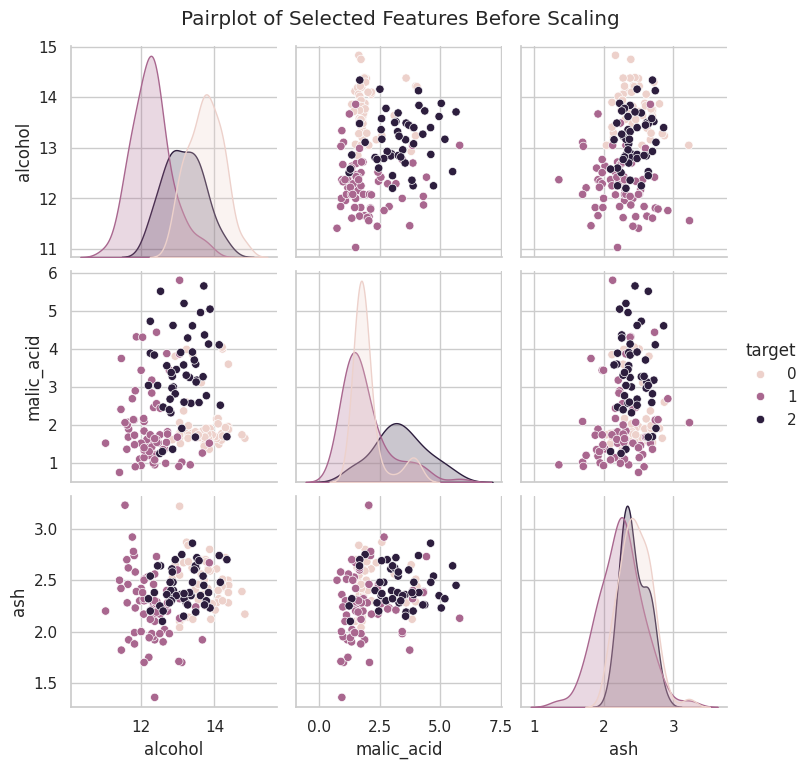

In [5]:
# Pairplot before scaling
sns.pairplot(pd.concat([X[['alcohol', 'malic_acid', 'ash']], y], axis=1), hue='target')
plt.suptitle("Pairplot of Selected Features Before Scaling", y=1.02)
plt.show()

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

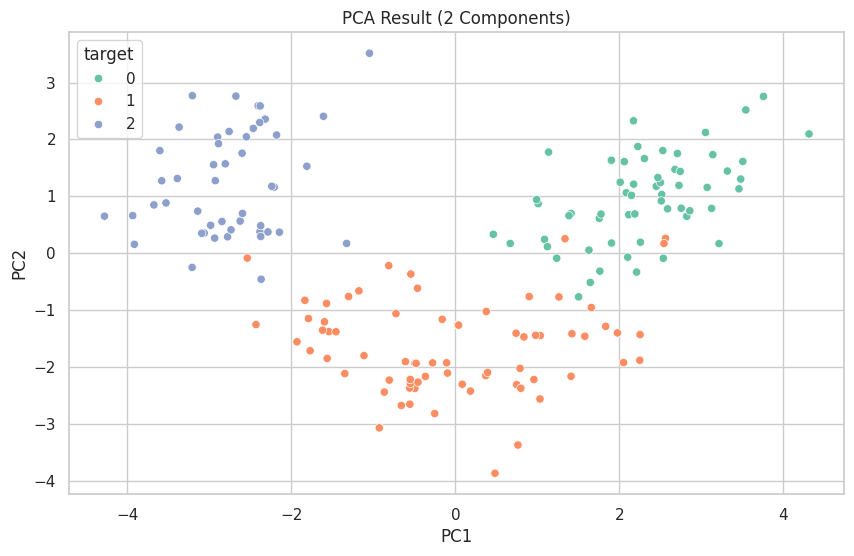

In [8]:
# Plot PCA result
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title("PCA Result (2 Components)")
plt.show()


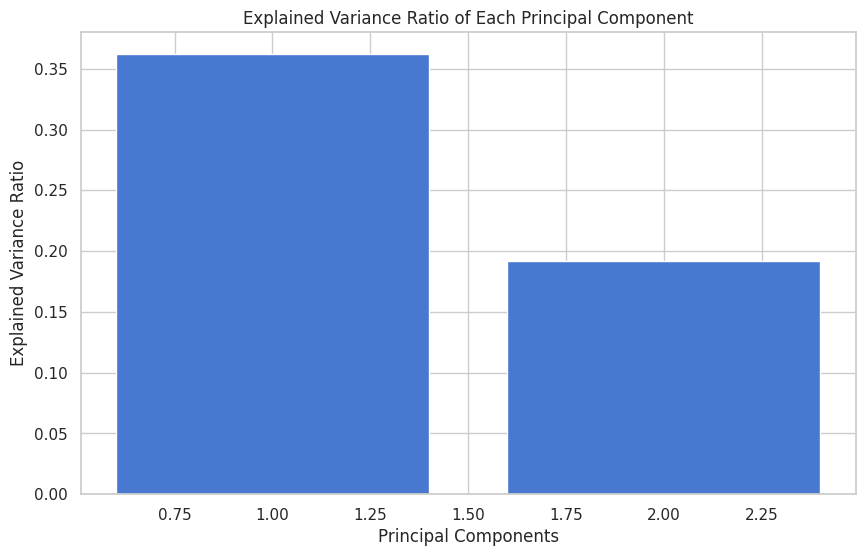

In [9]:
# Explained variance ratio plot
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title("Explained Variance Ratio of Each Principal Component")
plt.show()

In [12]:
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

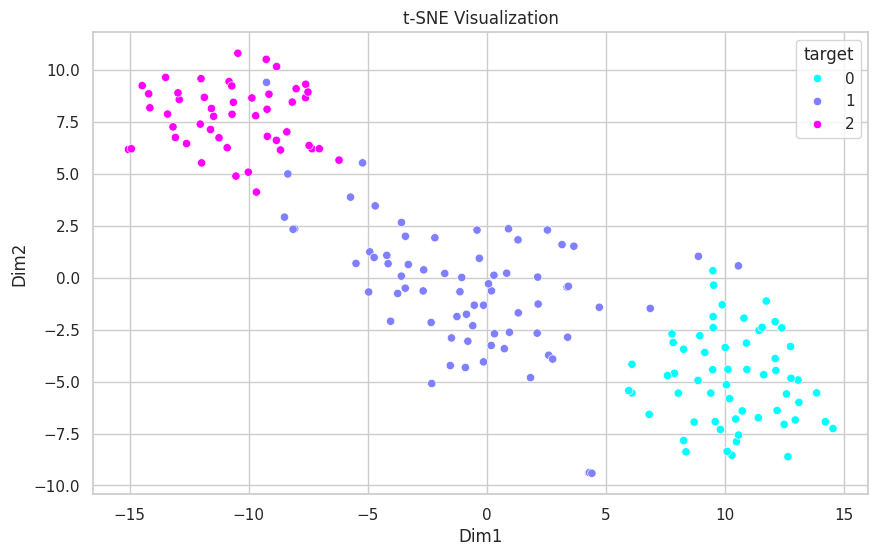

In [13]:
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['target'] = y
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='target', palette='cool')
plt.title("t-SNE Visualization")
plt.show()

In [14]:
# LDA (supervised dimensionality reduction)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

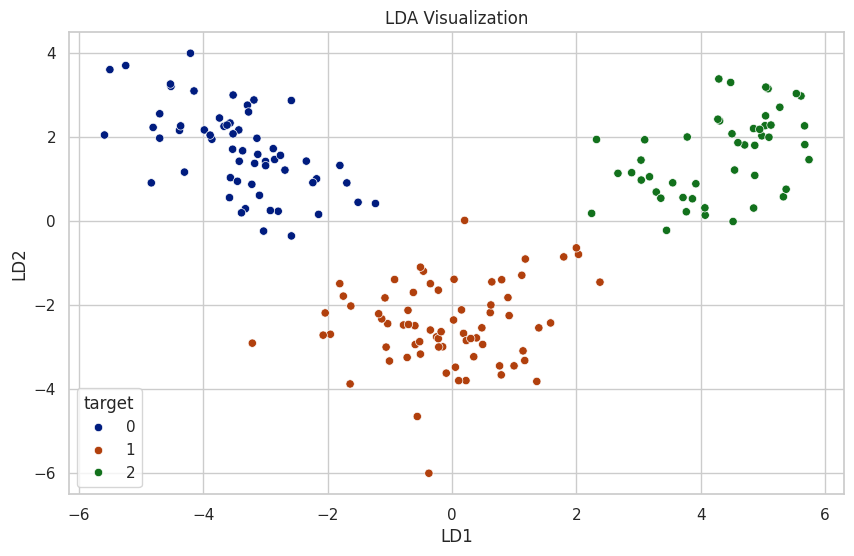

In [15]:
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='target', palette='dark')
plt.title("LDA Visualization")
plt.show()

In [16]:
# Clustering in PCA space
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

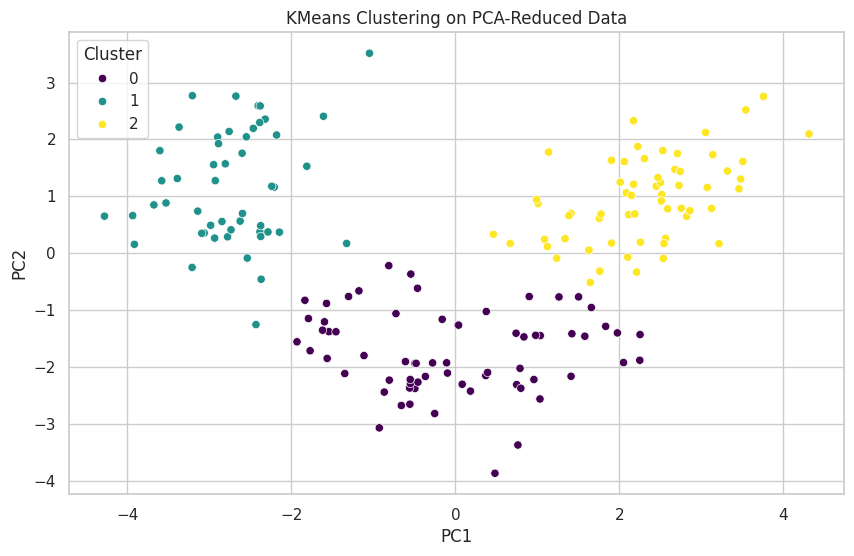

In [17]:
cluster_df = pca_df.copy()
cluster_df['Cluster'] = cluster_labels
sns.scatterplot(data=cluster_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.show()

In [18]:
# Silhouette Score
score = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score for KMeans clustering on PCA-reduced data: {score:.2f}")

Silhouette Score for KMeans clustering on PCA-reduced data: 0.56


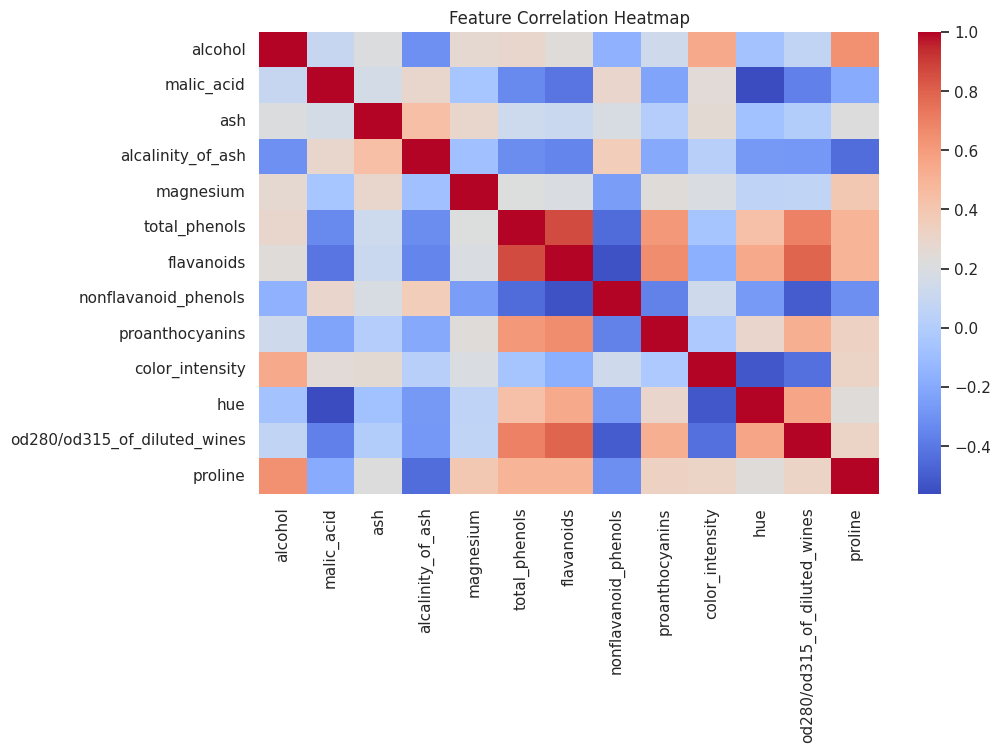

In [19]:
# Heatmap of correlations
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


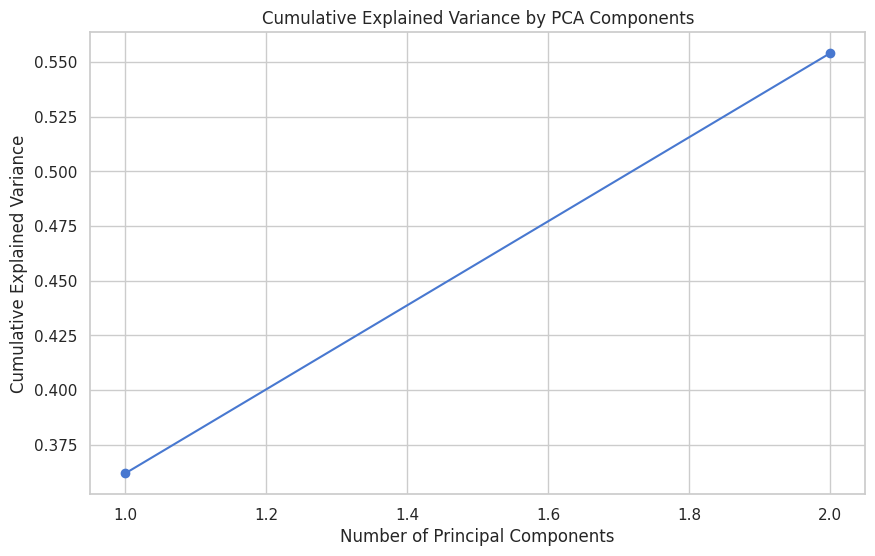

In [20]:
# Cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.show()


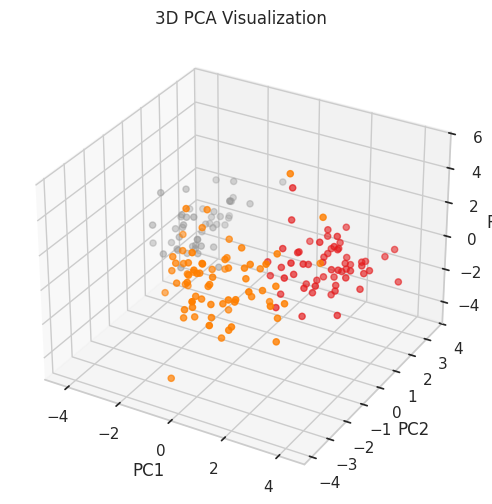

In [21]:
# PCA 3D Visualization
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3).fit_transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=y, cmap='Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA Visualization")
plt.show()